In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [3]:
y = df['price']
X = df.drop(columns='price')

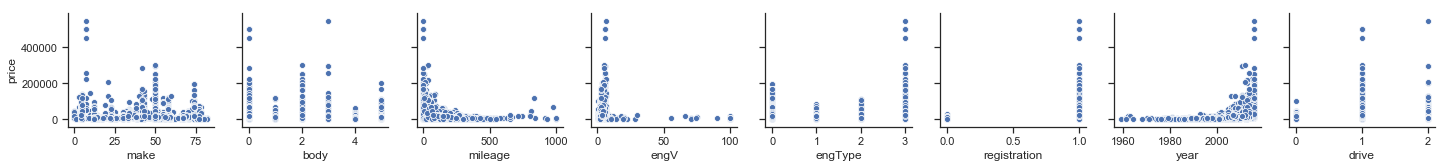

In [4]:
# Pairplot!
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['price'], x_vars=X.columns)
plt.show()

## 1.2 Split the data into test and train datasets using train_test_split

In [5]:
# Split the dataset into train and test groups, 50% of datapoints into each.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [6]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [7]:
print(f"Intercept   : {model.intercept_:.2f}")
print("\nCoefficients:\n")
for var, coef in zip(X.columns, model.coef_):
    print(f'{var:>12}: {coef:.2f}')


Intercept   : -2184591.01

Coefficients:

        make: -35.22
        body: -1672.12
     mileage: -37.13
        engV: 269.62
     engType: -1284.74
registration: 4649.46
        year: 1098.28
       drive: 7886.89


## 1.5 Use the test data to make predictions

In [8]:
y_pred = model.predict(X_test)
print(y_pred.shape)
y_pred

(4248,)


array([18501.5313198 ,  5449.53615628, 25121.57031334, ...,
       20204.90435025, 21612.72025077,  8218.38709262])

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [9]:
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print(f'RMSE : {RMSE:.2f}')
print(f'R^2  : {R2:.2f}')

RMSE : 22470.11
R^2  : 0.27


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The coefficient is positive, so later years correspond to higher prices. Each added year corresponds, on average, to a price increase of 1098.28.  

## 1.8 How should we interpret the Root-Mean-Square Error?

The regression line (which could be multidimensional) predicts the average y value associated with a given value of X. The RMSE is a measure of the spread of y values around that average. We improve the fit of our regression by minimizing the RMSE.

## 1.9 How should we interpret the $R^2$?

$R^2$ is a measure of goodness of fit, equal to the percentage of the dependent variable (y) that is explained by the model.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [10]:
df['ln_price'] = np.log(df['price'])
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

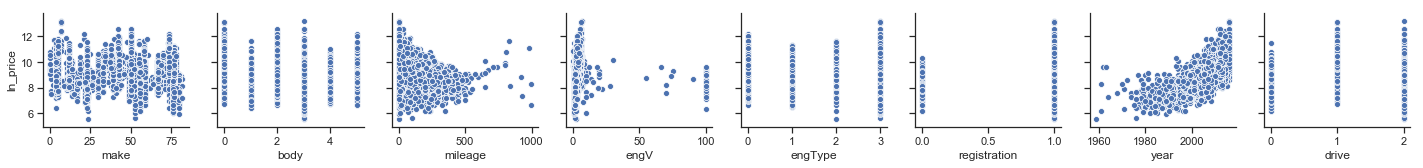

In [11]:
# I redefine X and y, to be sure of their content.
y = df['ln_price']
X = df.drop(columns=['price','ln_price'])

# Pairplot!
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=X.columns)
plt.show()

There's some definite curvature to mileage and year.  I should make a polynomial feature for both of those. To get even better information, I will also make some residual plots.

/anaconda3/envs/sandbox/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/anaconda3/envs/sandbox/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/anaconda3/envs/sandbox/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


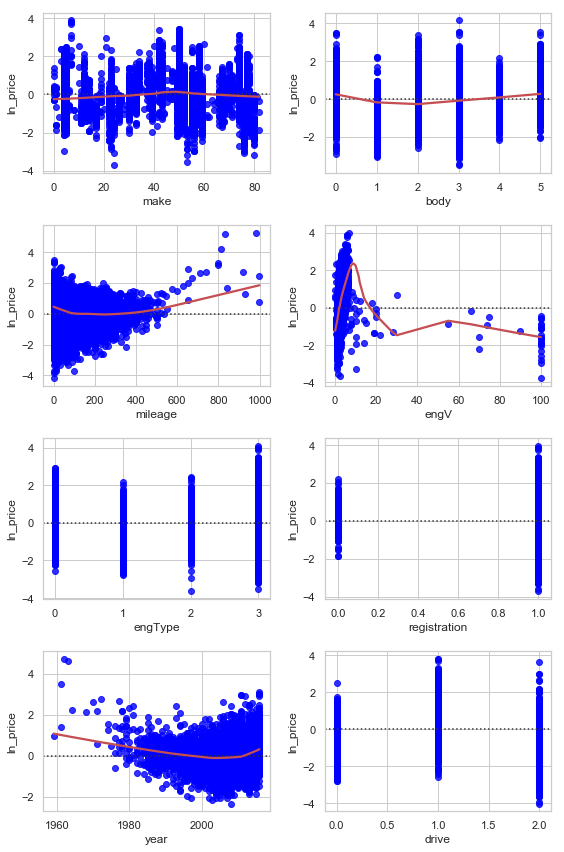

In [12]:
# There are 8 columns in X
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(8,12));

# Positions in the array of axes that I just made
position_list = []
for i in range(5):
    for j in range(2):
        position_list.append((i,j))
        
for col, pos in zip(X.columns, position_list):
    sns.residplot(X[col], y, lowess=True, color="r", ax=axs[pos[0]][pos[1]],
                  scatter_kws={'color':'blue'})
plt.tight_layout()

The residuals plots confirm non-linearity for mileage and year: the red residual line has a definite curvature. They also suggest some non-linearity for body and (especially) engV.  I'll create polynomial features for all of them.

## 2.3 If appropriate, create any polynomial features. 

In [13]:
df['mileage_sq'] = df['mileage']**2
df['year_sq'] = df['year']**2
df['body_sq'] = df['body']**2
df['engV_sq'] = df['engV']**2
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,mileage_sq,year_sq,body_sq,engV_sq
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4624,4040100,0,6.25
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,29929,4044121,9,3.24
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,18225,4032064,4,30.25
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,26244,4048144,25,3.24
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,6889,4052169,0,4.00


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [14]:
# Re-establish X and y from expanded df
y = df['ln_price']
X = df.drop(columns=['price','ln_price'])

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5)

#Fit to model
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

# Print report
print(f"Intercept   : {model.intercept_:.2f}")
print(f'RMSE        : {RMSE:.2f}')
print(f'R^2         : {R2:.2f}')

print("\nCoefficients:\n")
for var, coef in zip(X.columns, model.coef_):
    print(f'{var:>12}: {coef:.4f}')

Intercept   : 8221.50
RMSE        : 0.52
R^2         : 0.71

Coefficients:

        make: -0.0013
        body: -0.1068
     mileage: 0.0003
        engV: 0.3013
     engType: -0.0376
registration: 0.6172
        year: -8.3011
       drive: 0.2107
  mileage_sq: 0.0000
     year_sq: 0.0021
     body_sq: 0.0088
     engV_sq: -0.0031


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

A change of 1 year is, on average, associated with a change in ln(y) of -6.333.  

It's a common approximation that the coefficients correspond to percent changes in y (careful, not ln(y)), but that approximation holds for coefficient values between -0.1 and 0.1.  For coefficients outside that range, like this one, it's better to stick with the interpretation above.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent seeks to minimize the value of the cost function.  We can define that one to be whatever we want, but it should compare our hypothesis to the actual values of y and reflect how well the hypothesis fits the data.  In our exercises, we have been using the sum of squared errors as our error function.

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate is a scalar, and it represents the size of steps that our gradient descent algorithm will take in each iteration. The learning rate gets multiplied against the following at each iteration:
1. The cost function, evaluated at the current point in coefficient-space.
2. The negative gradient of the cost function at this point in coefficient-space, which itself is composed of partial derivatives for each of the coefficients.

The negative gradient tells the algorithm which way in coefficient-space to update for the next step. The learning rate determines how far we want the algorithm to move in that direction. Smaller steps follow the gradient more closely, but result in slower convergence and can leave the algorithm stuck in small local minima.  Larger steps lead to faster convergence, but they can overshoot past the minimum and cause divergent behavior.

The internet contains myriad complex variations on the learning rate, to prevent the algorithm from falling into local minima and helping it move faster towards the best possible solution. 

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [15]:
# We can set sm.OLS to automatically account for heteroskedasticity, by using the 
# parameter cov_type='HC3'.
y = df['ln_price']
X = df.drop(columns=['price','ln_price'])
X.insert(0,'const',1.0)
model = sm.OLS(y, X).fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1876.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:53:21   Log-Likelihood:                -5918.6
No. Observations:                8495   AIC:                         1.186e+04
Df Residuals:                    8482   BIC:                         1.195e+04
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6683.5119    714.414      9.355   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [16]:
# Calculate the VIF
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Determine outliers.  The usual rule of thumb is that any VIF above 10 (or sometimes 5) 
# corresponds to unacceptably high collinearity.
yikes = [i > 10 for i in vifs]

# Plot with cute srtring formatting
for col, vif, yike in zip(X.columns, vifs, yikes):
    print(f'{col:15} {vif:<7.2f} {"<<" if yike else ""}')

const           3423029618.12 <<
make            1.08    
body            11.29   <<
mileage         7.56    
engV            23.92   <<
engType         1.34    
registration    1.11    
year            164292.77 <<
drive           1.25    
mileage_sq      5.08    
year_sq         164633.03 <<
body_sq         11.58   <<
engV_sq         23.75   <<


Ugh. Looks like several of the variables have collinearity issues.  Further work will be required to resolve those.